# Bank data

## Importing Libraries and calling data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('Bank_practice.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df=pd.DataFrame(data)

# Checking some information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.shape

(5000, 14)

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df['CCAvg']

0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 5000, dtype: float64

In [8]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

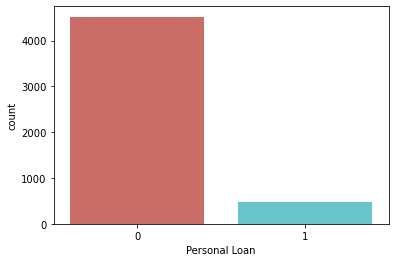

In [9]:
sns.countplot(x='Personal Loan',data=df , palette='hls')
plt.show()

In [10]:
df.groupby('Personal Loan').mean()
#The average age of customers who get personal loan is 
#almost equal with that of the customers who didn’t.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.165487,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [11]:
for col in df:  #precentage of nulls
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Age - 0%
Experience - 0%
Income - 0%
ZIP Code - 0%
Family - 0%
CCAvg - 0%
Education - 0%
Mortgage - 0%
Personal Loan - 0%
Securities Account - 0%
CD Account - 0%
Online - 0%
CreditCard - 0%


In [12]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Data Science 

### Checking if different valuables have noise

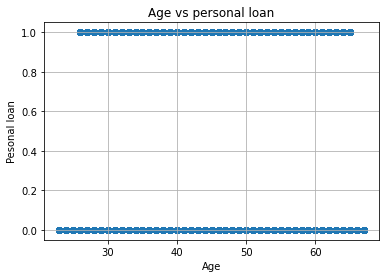

In [13]:
plt.scatter(df['Age'],df['Personal Loan'])
plt.xlabel('Age')
plt.ylabel('Pesonal loan')
plt.title('Age vs personal loan')
plt.grid()
#it sounds ok

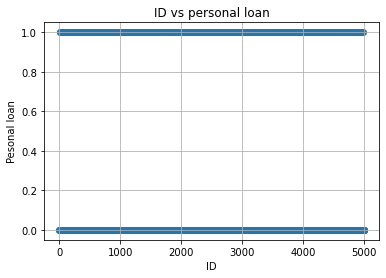

In [14]:
plt.scatter(df['ID'],df['Personal Loan'])
plt.xlabel('ID')
plt.ylabel('Pesonal loan')
plt.title('ID vs personal loan')
plt.grid()
# it seems ok

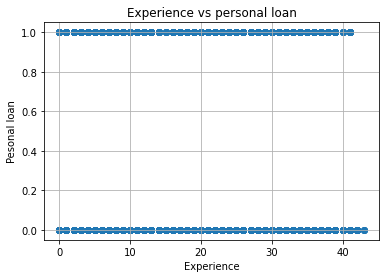

In [15]:
plt.scatter(df['Experience'],df['Personal Loan'])
plt.xlabel('Experience')
plt.ylabel('Pesonal loan')
plt.title('Experience vs personal loan')
plt.grid()
# it seems ok

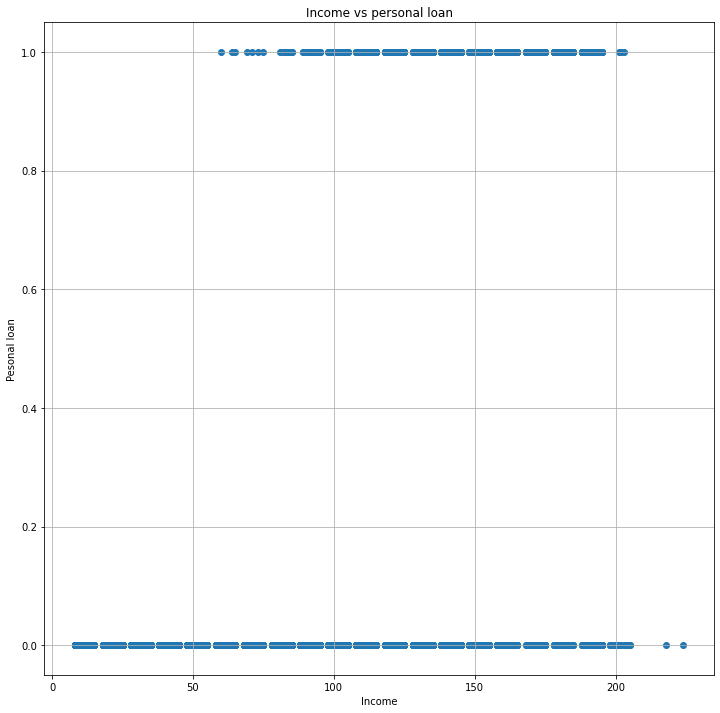

In [16]:
plt.figure(figsize=(12,12))
plt.scatter(df['Income'],df['Personal Loan'])
plt.xlabel('Income')
plt.ylabel('Pesonal loan')
plt.title('Income vs personal loan')
plt.grid()
# It sounds like there are 2 point that need to be considered

In [17]:
noise1 = df[(df['Income']>200)]
noise1
#income 218 va 224 are sensitive

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
526,527,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
677,678,46,21,204,92780,2,2.80,1,0,0,0,0,1,0
787,788,45,15,202,91380,3,10.00,3,0,1,0,0,0,0
1711,1712,27,3,201,95819,1,6.33,1,158,0,0,0,1,0
1901,1902,43,19,201,94305,2,6.67,1,0,0,1,0,1,0
2101,2102,35,5,203,95032,1,10.00,3,0,1,0,0,0,0
2278,2279,30,4,204,91107,2,4.50,1,0,0,0,0,1,0
2337,2338,43,16,201,95054,1,10.00,2,0,1,0,0,0,1
2447,2448,44,19,201,95819,2,8.80,1,0,0,0,0,1,1
2988,2989,46,21,205,95762,2,8.80,1,181,0,1,0,1,0


In [18]:
noise1 = df[(df['Income']>215)]
noise1
#we will remember these rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0


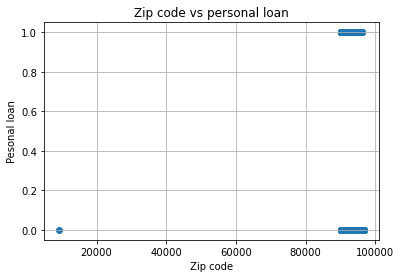

In [19]:
plt.scatter(df['ZIP Code'],df['Personal Loan'])
plt.xlabel('Zip code')
plt.ylabel('Pesonal loan')
plt.title('Zip code vs personal loan')
plt.grid()
# there is a sample , looks like noise

In [20]:
noise2 = df[(df['ZIP Code']<20000)]
noise2

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


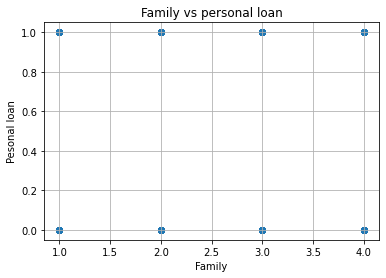

In [21]:
plt.scatter(df['Family'],df['Personal Loan'])
plt.xlabel('Family')
plt.ylabel('Pesonal loan')
plt.title('Family vs personal loan')
plt.grid()

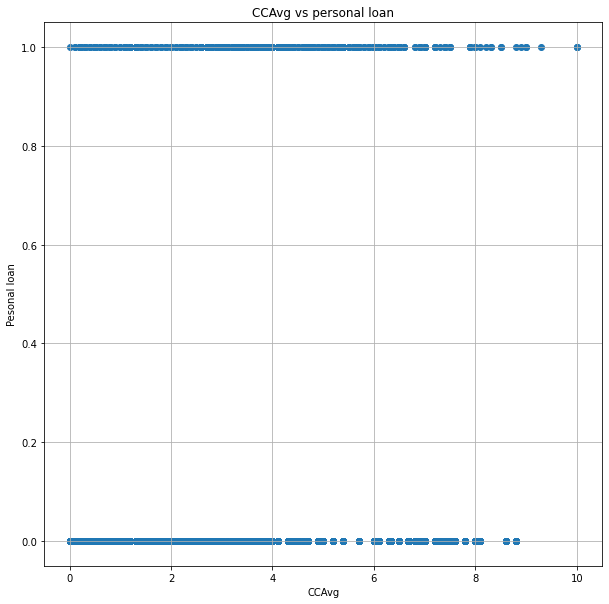

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(df['CCAvg'],df['Personal Loan'])
plt.xlabel('CCAvg')
plt.ylabel('Pesonal loan')
plt.title('CCAvg vs personal loan')
plt.grid()
# there are some cases that should be checked

In [23]:
df[(df['CCAvg']>9)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
787,788,45,15,202,91380,3,10.0,3,0,1,0,0,0,0
2101,2102,35,5,203,95032,1,10.0,3,0,1,0,0,0,0
2337,2338,43,16,201,95054,1,10.0,2,0,1,0,0,0,1
3943,3944,61,36,188,91360,1,9.3,2,0,1,0,0,0,0


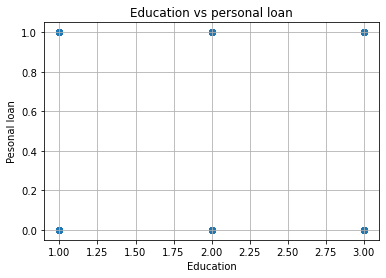

In [24]:
plt.scatter(df['Education'],df['Personal Loan'])
plt.xlabel('Education')
plt.ylabel('Pesonal loan')
plt.title('Education vs personal loan')
plt.grid()

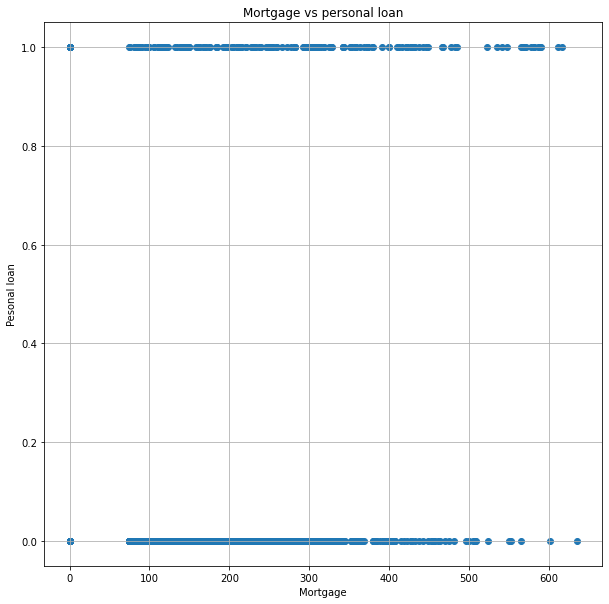

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(df['Mortgage'],df['Personal Loan'])
plt.xlabel('Mortgage')
plt.ylabel('Pesonal loan')
plt.title('Mortgage vs personal loan')
plt.grid()

In [26]:
df[(df['Mortgage']==0)&(df['Personal Loan']==1)]
#these cases are people those who had rented house and still get loan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
57,58,56,31,131,95616,2,1.2,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


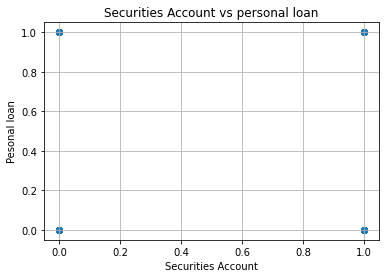

In [27]:
plt.scatter(df['Securities Account'],df['Personal Loan'])
plt.xlabel('Securities Account')
plt.ylabel('Pesonal loan')
plt.title('Securities Account vs personal loan')
plt.grid()

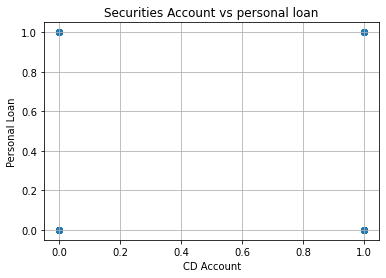

In [28]:
plt.scatter(df['CD Account'],df['Personal Loan'])
plt.xlabel('CD Account')
plt.ylabel('Personal Loan')
plt.title('Securities Account vs personal loan')
plt.grid()

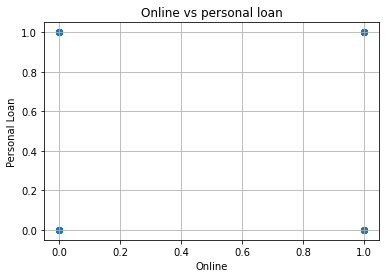

In [29]:
plt.scatter(df['Online'],df['Personal Loan'])
plt.xlabel('Online')
plt.ylabel('Personal Loan')
plt.title('Online vs personal loan')
plt.grid()

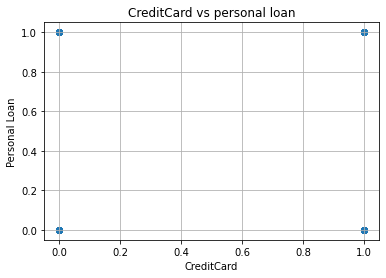

In [30]:
plt.scatter(df['CreditCard'],df['Personal Loan'])
plt.xlabel('CreditCard')
plt.ylabel('Personal Loan')
plt.title('CreditCard vs personal loan')
plt.grid()

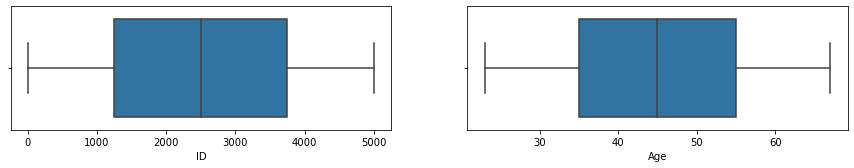

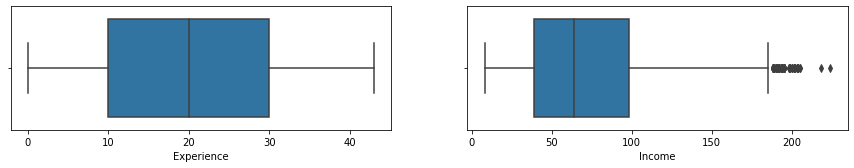

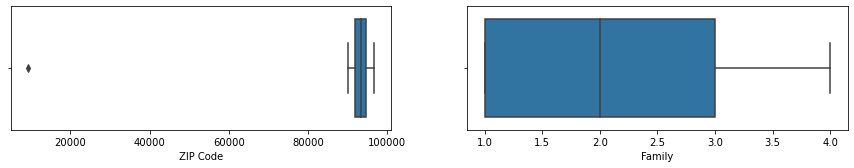

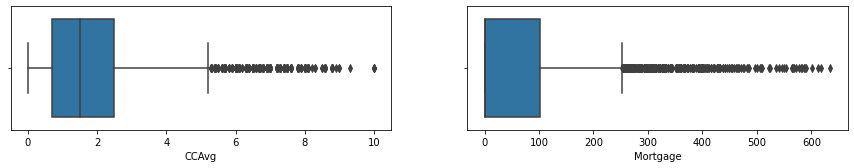

In [31]:
Numerical = ['ID','Age','Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Mortgage']
i = 0 
while i < 8:
    fig = plt.figure(figsize=[15,5])
    plt.subplot(2,2,1)
    sns.boxplot(x=Numerical[i],data=df)
    i+=1
    plt.subplot(2,2,2)
    sns.boxplot(x=Numerical[i],data=df)
    i+=1
    plt.show()

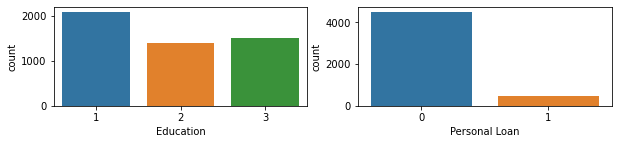

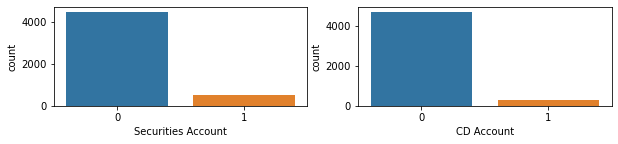

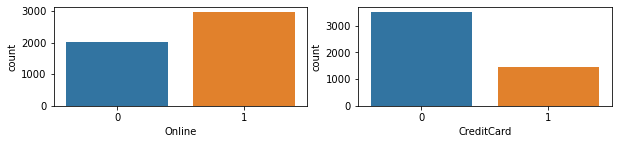

In [32]:
Categorical = [ 'Education', 'Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard']
i = 0 
while i < 6:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(2,2,1)
    sns.countplot(x=Categorical[i],data=df)
    i+=1
    plt.subplot(2,2,2)
    sns.countplot(x=Categorical[i],data=df)
    i+=1
    plt.show()

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIP Code'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

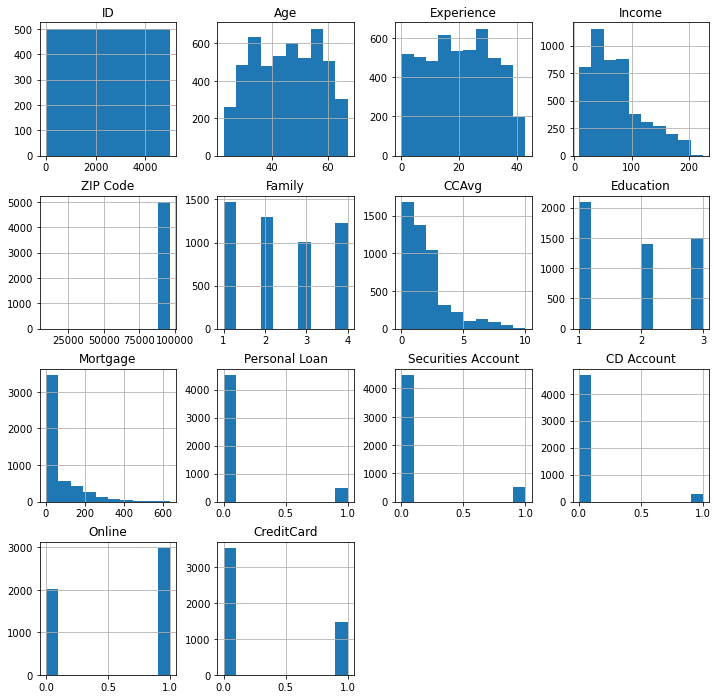

In [33]:
df.hist(figsize=(12,12))

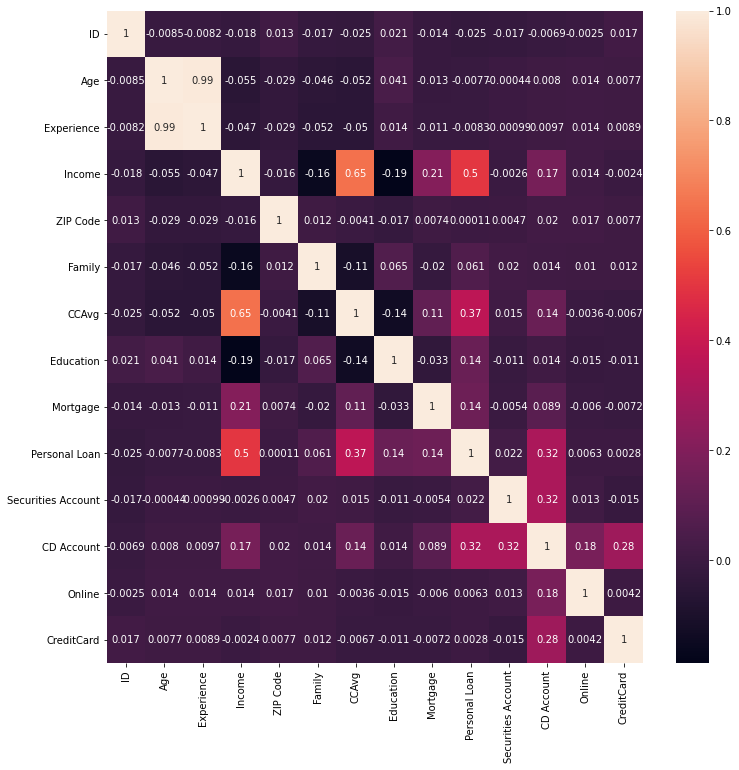

In [34]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(correlation, annot = True)
plt.show()

In [35]:
# in above heatmap, obviously Income has most effect on personal loan with 0.5
# Experience and Age are corrolated

# Pie chart

### we should separate the people who get loan and doesn't get

In [36]:
df1=df.loc[df['Personal Loan'] == 1]

In [37]:
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [38]:
df0=df.loc[df['Personal Loan']==0]

In [39]:
df0

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


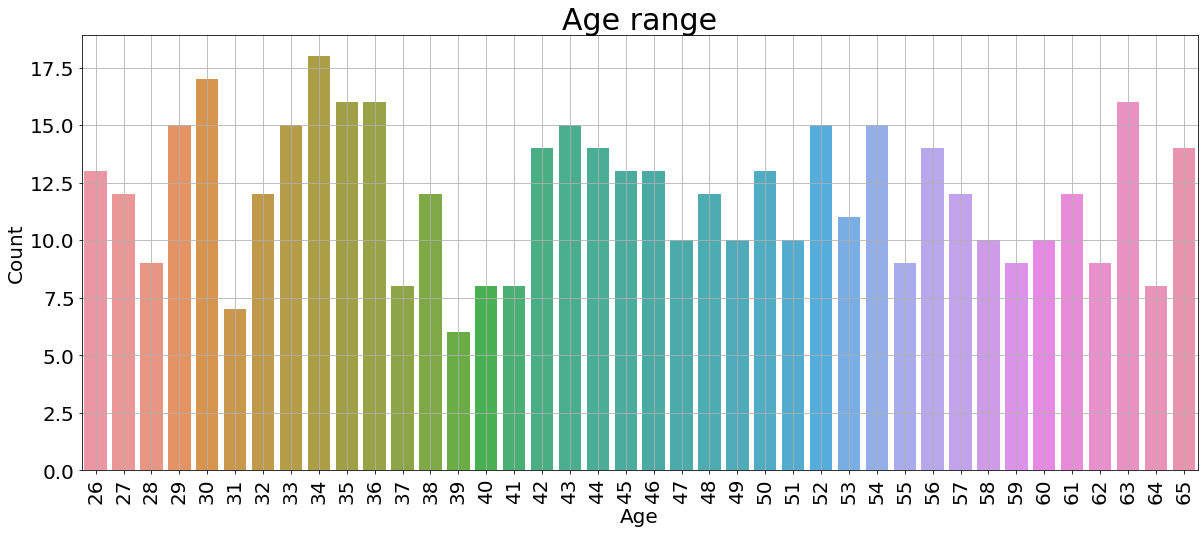

In [40]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Age',data=df1)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Age range',fontsize=30)
plt.grid()

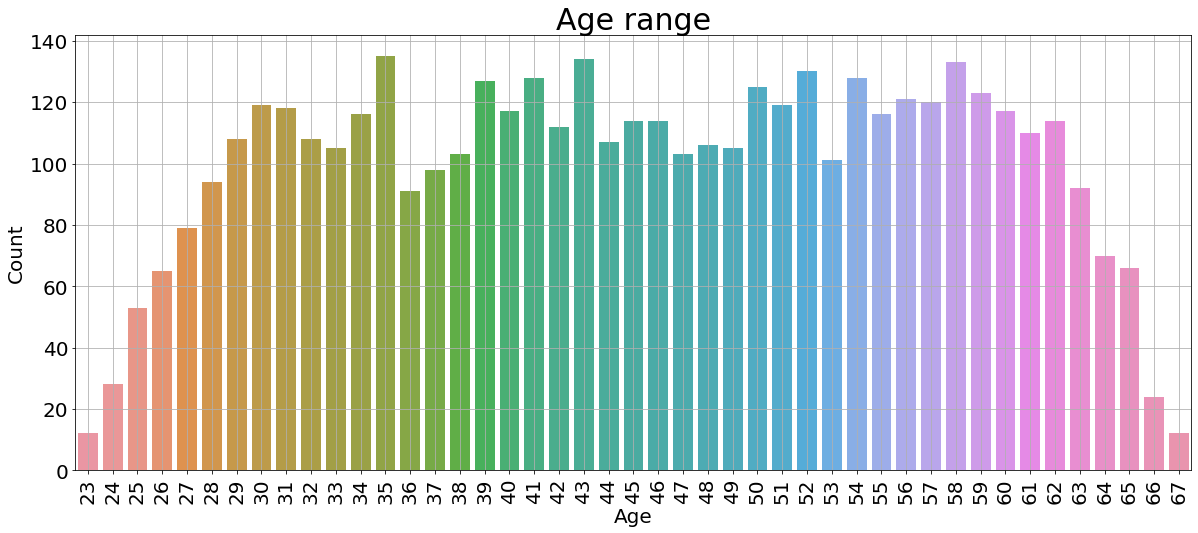

In [41]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Age',data=df0)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Age range',fontsize=30)
plt.grid()

In [42]:
# Age>65 and Age < 26 didn't get Personal Loan at all

# df1 = loan
# df0 = no loan

In [43]:
df1['Education'].value_counts()

3    205
2    182
1     93
Name: Education, dtype: int64

In [44]:
df0['Education'].value_counts()

1    2003
3    1296
2    1221
Name: Education, dtype: int64

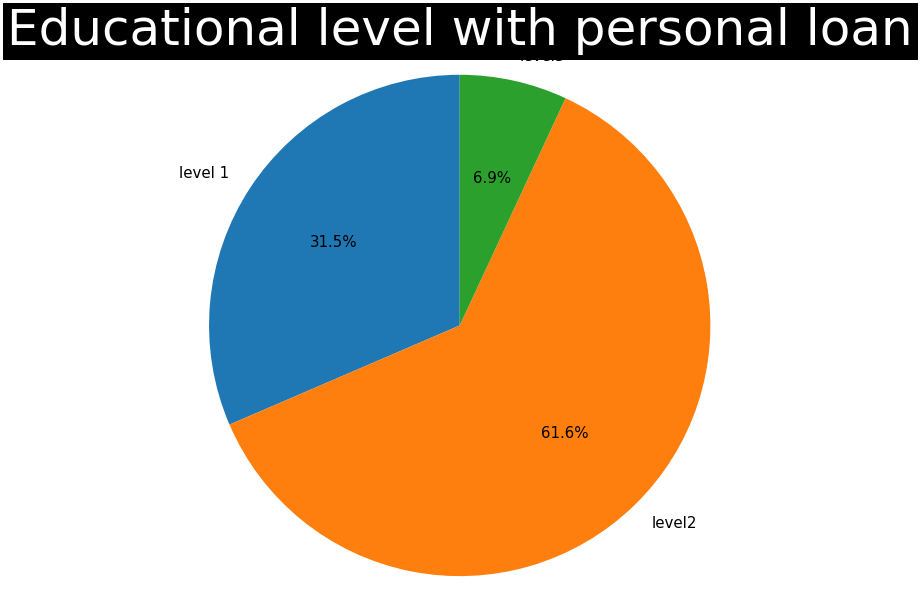

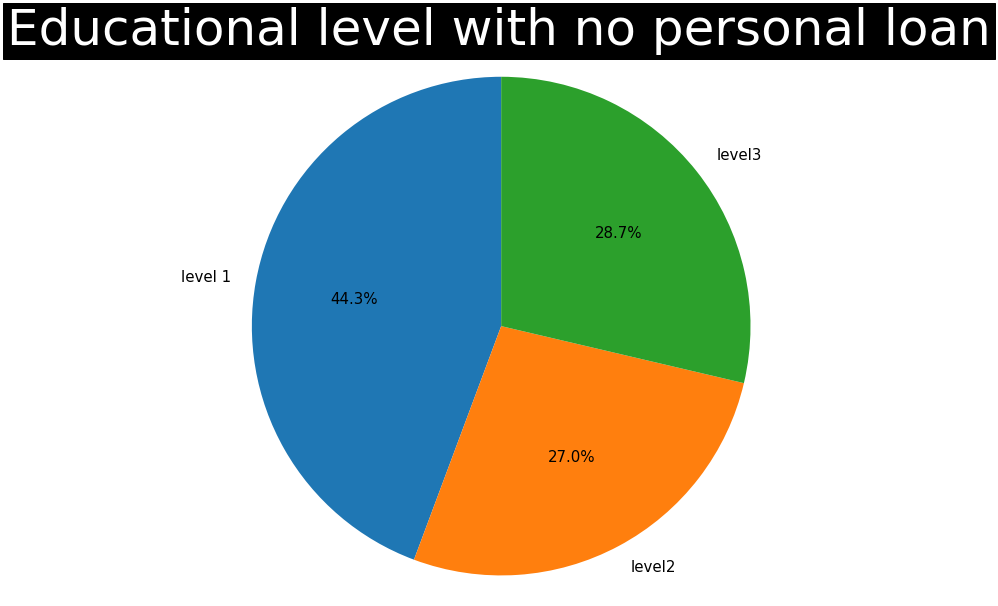

In [45]:
labels = 'level 1','level2','level3'
sizes1= [93*100/480 , 182*100/480 , 205*100/4800]
explode1 = (0,0,0) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('Educational level with personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes1, explode=explode1, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  

labels = 'level 1','level2','level3'
sizes10= [2003*100/4520 , 1221*100/4520 , 1296*100/4520]
explode10 = (0,0,0) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('Educational level with no personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes10, explode=explode10, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  
plt.show()

In [46]:
# People with level 2 of education had better chance to get loan

In [47]:
df1['Securities Account'].value_counts()

0    420
1     60
Name: Securities Account, dtype: int64

In [48]:
df0['Securities Account'].value_counts()

0    4058
1     462
Name: Securities Account, dtype: int64

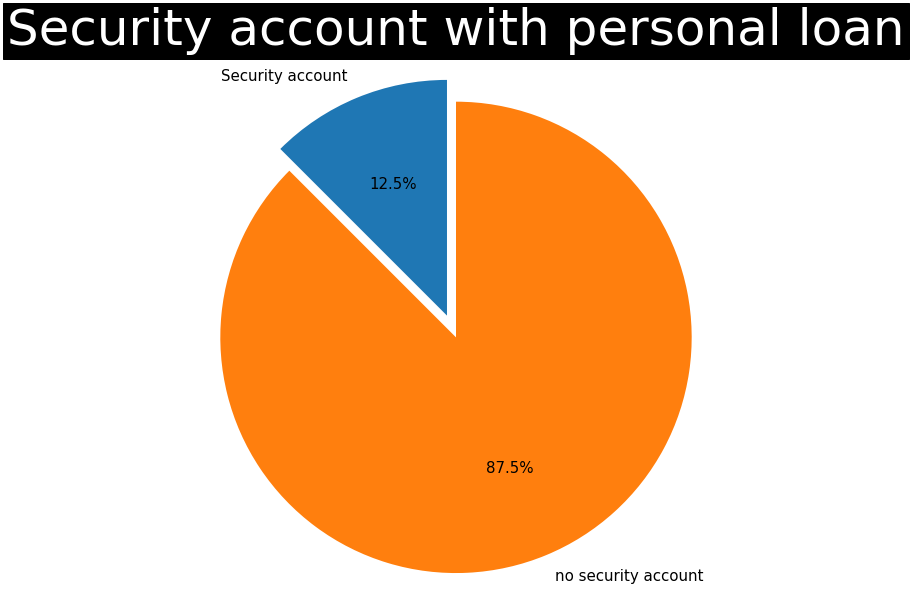

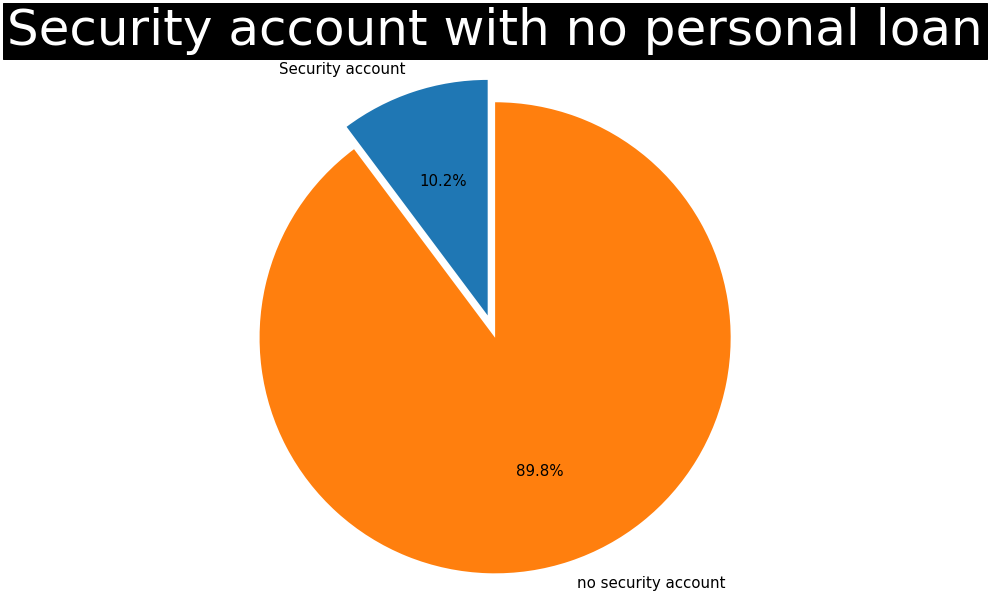

In [49]:
labels = 'Security account','no security account'
sizes2= [60*100/480 , 420*100/480 ]
explode2 = (0,0.1) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('Security account with personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes2, explode=explode2, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  

labels = 'Security account','no security account'
sizes20= [462*100/4520 , 4058*100/4520 ]
explode20 = (0,0.1) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('Security account with no personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes20, explode=explode20, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  
plt.show()

In [50]:
# There is no obivious difference between Security account and no security account

In [51]:
df1['CD Account'].value_counts()

0    340
1    140
Name: CD Account, dtype: int64

In [52]:
df0['CD Account'].value_counts()

0    4358
1     162
Name: CD Account, dtype: int64

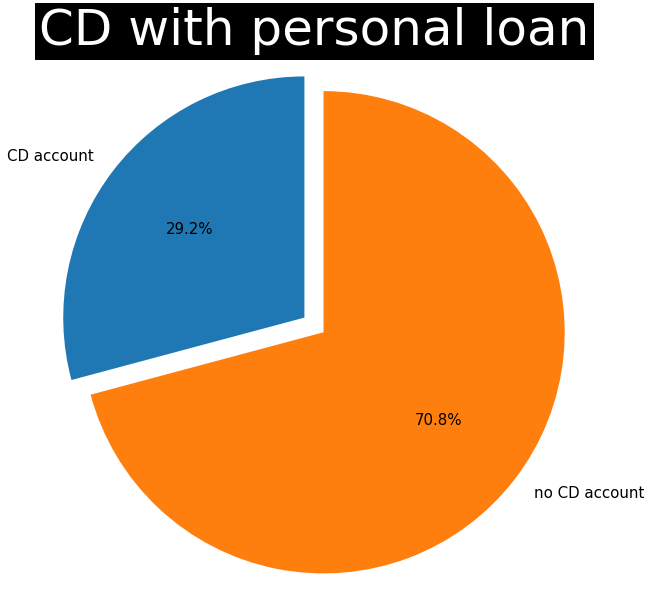

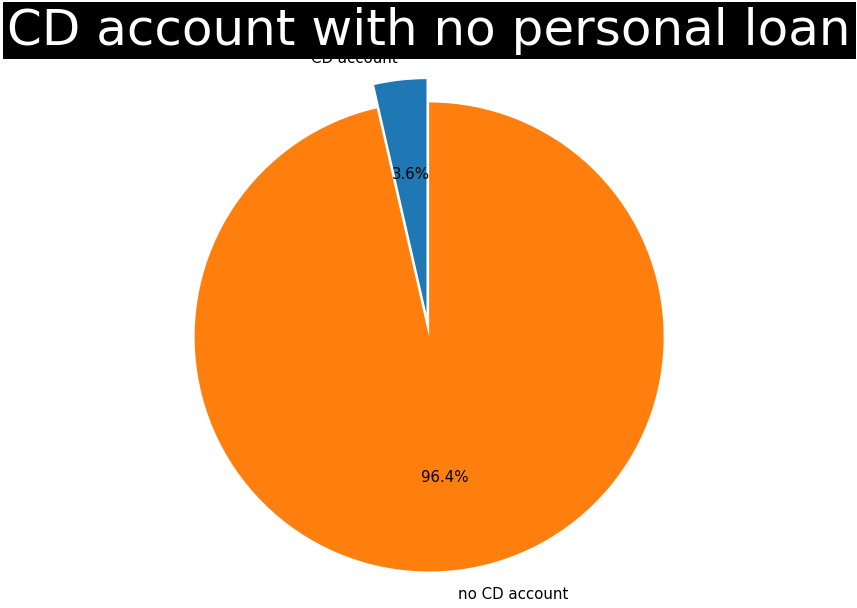

In [53]:
labels = 'CD account','no CD account'
sizes3= [140*100/480,340*100/480]
explode3 = (0,0.1) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('CD with personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes3, explode=explode3, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  

labels = 'CD account','no CD account'
sizes30= [162*100/4520 , 4358*100/4520 ]
explode30 = (0,0.1) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('CD account with no personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes30, explode=explode30, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  
plt.show()

In [54]:
# People with CD account could take loan more than those with no CD Account

In [55]:
df1['Online'].value_counts()

1    291
0    189
Name: Online, dtype: int64

In [56]:
df0['Online'].value_counts()

1    2693
0    1827
Name: Online, dtype: int64

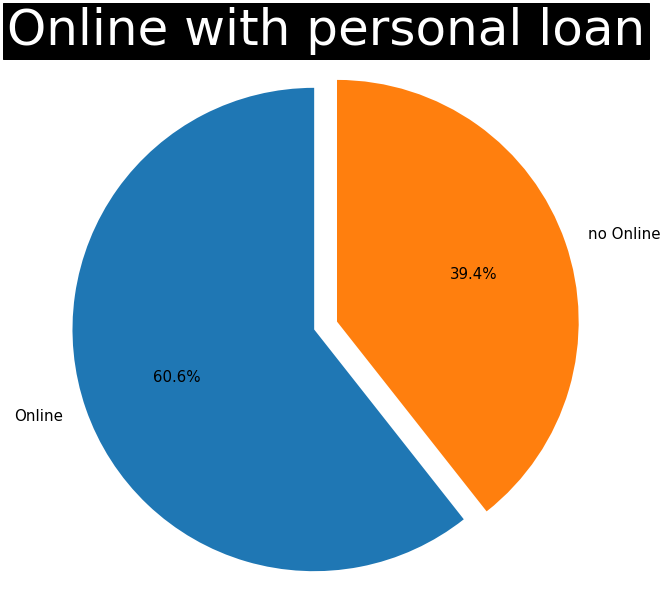

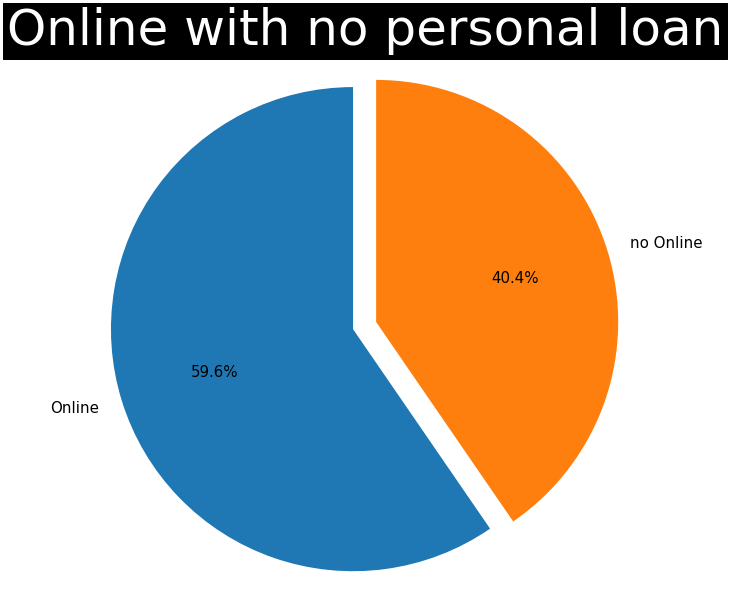

In [57]:
labels = 'Online','no Online'
sizes4= [291*100/480,189*100/480]
explode4 = (0,0.1) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('Online with personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes4, explode=explode4, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  

labels = 'Online','no Online'
sizes40= [2693*100/4520 , 1827*100/4520 ]
explode40 = (0,0.1) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('Online with no personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes40, explode=explode40, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  
plt.show()

In [58]:
# There is no obivious difference between Online and no Online

In [59]:
df1['CreditCard'].value_counts()

0    337
1    143
Name: CreditCard, dtype: int64

In [60]:
df0['CreditCard'].value_counts()

0    3193
1    1327
Name: CreditCard, dtype: int64

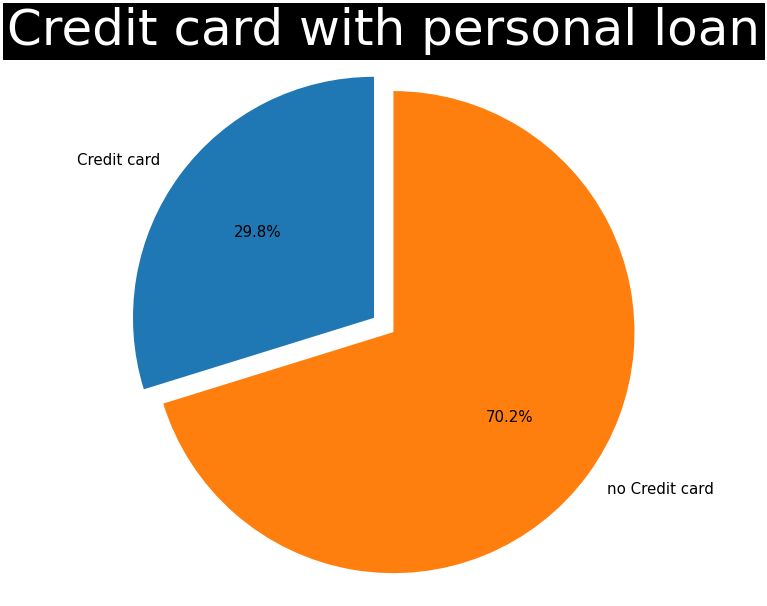

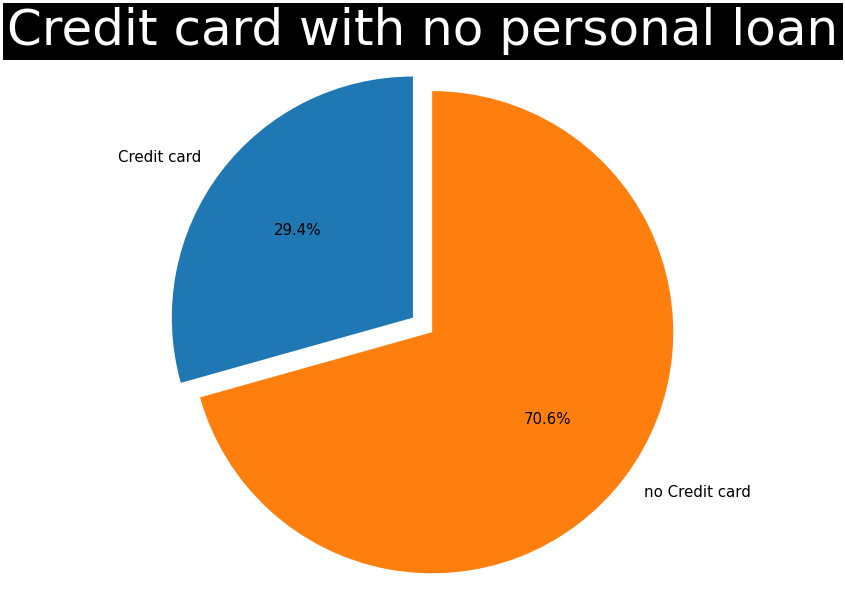

In [61]:
labels = 'Credit card','no Credit card'
sizes5= [143*100/480,337*100/480]
explode5 = (0,0.1) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('Credit card with personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes5, explode=explode5, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  

labels = 'Credit card','no Credit card'
sizes50= [1327*100/4520 , 3193*100/4520 ]
explode50 = (0,0.1) 
fig,ax=plt.subplots(figsize=(10,10))
plt.title('Credit card with no personal loan',fontsize=50,backgroundcolor='black',c='white')
ax.pie(sizes50, explode=explode50, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 ,textprops={'fontsize': 15})
ax.axis('equal')  
plt.show()

In [62]:
# There is no obivious difference between Credit card and no Credit card

In [63]:
df2=df.dropna(how='any')
df2.reset_index(drop=True,inplace=True)

In [64]:
df2.dropna()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [65]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [66]:
x = pd.DataFrame(df,columns=['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 'Online','CreditCard'])
y = df['Personal Loan'].values.reshape(-1,1)

In [67]:
x

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


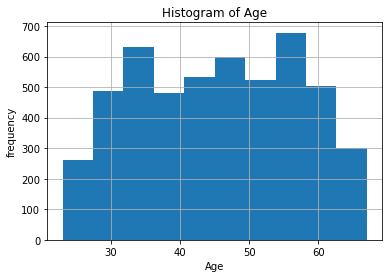

In [68]:
# in this histogram we find out what range of age group try to get loan 
df.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.savefig('hist_age')

# Data modelling

In [69]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [70]:
#Logistic Regression

In [71]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

D:\civil\python\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\civil\python\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
predict = logreg.predict(x_test)

In [73]:
#confusing matrix
from sklearn.metrics import confusion_matrix

In [74]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted no','Predicted yes'],index=['Actual no','Actual yes'])

,Predicted no,Predicted yes
Actual no,1324,48
Actual yes,69,59


In [75]:
#1324=TN   48=FN
#69=FP     59=TP

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1372
           1       0.55      0.46      0.50       128

    accuracy                           0.92      1500
   macro avg       0.75      0.71      0.73      1500
weighted avg       0.92      0.92      0.92      1500



# Logisitic gave us 92% Accuracy

# Multinomial 

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
MultiNB = MultinomialNB()
MultiNB.fit(x_train,y_train)
print(MultiNB)
y_pred = MultiNB.predict(x_test)
print (accuracy_score(y_test,y_pred))

MultinomialNB()
0.704


D:\civil\python\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [79]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted no','Predicted yes'],index=['Actual no','Actual yes'])

,Predicted no,Predicted yes
Actual no,978,394
Actual yes,50,78


In [80]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82      1372
           1       0.17      0.61      0.26       128

    accuracy                           0.70      1500
   macro avg       0.56      0.66      0.54      1500
weighted avg       0.88      0.70      0.77      1500



In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(8)
print(cross_val_score(MultiNB,x,y.ravel(),cv=k_fold,n_jobs=1))

[0.0992 0.6064 0.616  0.7488 0.7808 0.8656 0.8928 0.8608]


# Cross validation has been tested and it gets situation worse
# It made accuracy 62%
# So I decided to deleted it

# Now I want to increase The dimension
# x^2

In [82]:
def check(Dimension , testsize):
    acc=0.704
    for column in x:
        New_col_name = column +str(Dimension)
        New_col_val = x[column]**Dimension
        x.insert(0,New_col_name,New_col_val)
        x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=testsize ,random_state=0)
        New_model = MultinomialNB()
        New_model.fit(x_train,y_train)
        y_pred = New_model.predict(x_test)
        acc_new = accuracy_score(y_test,y_pred)
        if acc_new<acc:
            x.drop([New_col_name],axis=1,inplace=True)
        else:
            acc = acc_new
    print('Accuracy: ',acc)

In [83]:
check(2,0.2)

D:\civil\python\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\civil\python\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\civil\python\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:  0.87


D:\civil\python\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\civil\python\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\civil\python\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\civil\python\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [84]:
x.columns

Index(['CreditCard2', 'Online2', 'CD Account2', 'Securities Account2',
       'Education2', 'Family2', 'ZIP Code2', 'Income2', 'Age2', 'ID', 'Age',
       'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Accuracy has increased to 87 %

# KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [86]:
x = pd.DataFrame(df,columns=['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 'Online','CreditCard']).values
y = df['Personal Loan'].values.reshape(-1,1)

In [87]:
x_train, x_test , y_train , y_test = train_test_split (x,y,test_size=0.3,random_state=0)

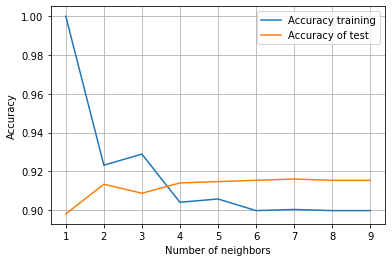

In [88]:
acc_training=[]
acc_test=[]
n_counters = range(1,10)
for n_neighbors in n_counters:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train.ravel())
    acc_training.append(knn.score(x_train,y_train))
    acc_test.append(knn.score(x_test,y_test))

plt.plot(n_counters,acc_training,label="Accuracy training")
plt.plot(n_counters,acc_test,label='Accuracy of test')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.grid()
plt.legend()

In [89]:
K = 4
# 4 samples which it has minimum distance
clf = KNeighborsClassifier(4)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [90]:
 print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.914


In [91]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1 ,50) }
grid_kn = GridSearchCV(estimator=knn ,param_grid=parameters, scoring = 'accuracy',
                       cv=5,
                       verbose=1,
                      n_jobs=-1)
grid_kn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [92]:
grid_kn.best_params_

{'n_neighbors': 7}

In [93]:
# it shows that k=7 is best one
#lets try it

In [94]:
K = 7
# 4 samples which it has minimum distance
clf = KNeighborsClassifier(7)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [95]:
 print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.916


In [96]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted no','Predicted yes'],index=['Actual no','Actual yes'])

,Predicted no,Predicted yes
Actual no,1372,0
Actual yes,126,2


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1372
           1       1.00      0.02      0.03       128

    accuracy                           0.92      1500
   macro avg       0.96      0.51      0.49      1500
weighted avg       0.92      0.92      0.88      1500



In [98]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [99]:
data = {'ID':[5071],
        'Age':[42],
        'Experience':[16],
        'Income':[30],
        'ZIP Code':[92037],
        'Family':[3],
        'CCAvg':[1.2],
        'Education':[3],
        'Mortgage':[0],
        'Securities Account':[1],
        'CD Account':[0],
        'Online':[1],
        'CreditCard':[1]}

In [100]:
data1=pd.DataFrame(data)

In [101]:
data1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,5071,42,16,30,92037,3,1.2,3,0,1,0,1,1


# Answer(KNN) 

In [102]:
clf.predict(data1)

array([0], dtype=int64)

In [103]:
#He can not get loan